In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [212]:
from datetime import date

today = date.today()


In [213]:
# see filename format and enter today's date to get latest data
latest_data = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{}.xlsx'.format(today))

In [214]:
latest_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
1,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0


In [215]:
latest_data.dtypes

dateRep                    datetime64[ns]
day                                 int64
month                               int64
year                                int64
cases                               int64
deaths                              int64
countriesAndTerritories            object
geoId                              object
countryterritoryCode               object
popData2018                       float64
dtype: object

In [216]:
#latest_data['dateRep']=pd.to_datetime(latest_data['dateRep']).dt.strftime('%d %b')

In [217]:
india_data = latest_data[latest_data['countriesAndTerritories'] == 'India']

In [218]:
india_data.index=range(len(india_data))

In [219]:
india_data.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-05,5,4,2020,472,9,India,IN,IND,1.352617e+09
1,2020-04-04,4,4,2020,601,12,India,IN,IND,1.352617e+09
2,2020-04-03,3,4,2020,336,6,India,IN,IND,1.352617e+09
3,2020-04-02,2,4,2020,568,15,India,IN,IND,1.352617e+09
4,2020-04-01,1,4,2020,146,3,India,IN,IND,1.352617e+09
5,2020-03-31,31,3,2020,180,3,India,IN,IND,1.352617e+09
6,2020-03-30,30,3,2020,92,4,India,IN,IND,1.352617e+09
7,2020-03-29,29,3,2020,106,6,India,IN,IND,1.352617e+09
8,2020-03-28,28,3,2020,149,2,India,IN,IND,1.352617e+09
9,2020-03-27,27,3,2020,75,4,India,IN,IND,1.352617e+09


In [220]:
india_dates = india_data['dateRep']
india_cases = india_data['cases']
india_deaths=india_data['deaths']

In [221]:
#print(india_dates)

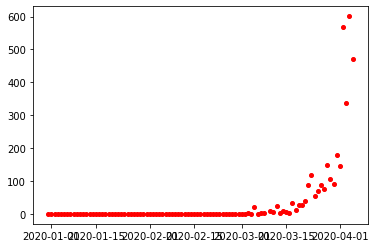

In [222]:
plt.plot(india_dates, india_cases, 'ro', markersize = 4)

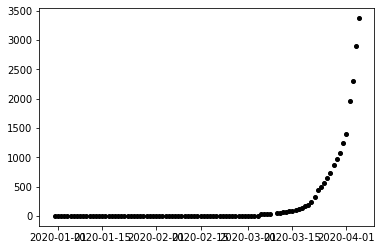

In [223]:
# cumulative cases
plt.plot(india_dates, np.cumsum(india_cases[::-1])[::-1] , 'ko', markersize = 4)

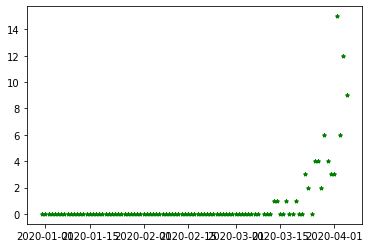

In [224]:
#death plot
plt.plot(india_dates, india_deaths, 'g*', markersize = 4)

# checking whether india has any similarity with italy,usa and spain 

In [225]:
italy_data = latest_data[latest_data['countriesAndTerritories'] == 'Italy']
china_data = latest_data[latest_data['countriesAndTerritories'] == 'China']
usa_data = latest_data[latest_data['countriesAndTerritories'] == 'United_States_of_America']

In [226]:
italy_data.index=range(len(italy_data))
china_data.index=range(len(china_data))
usa_data.index=range(len(usa_data))

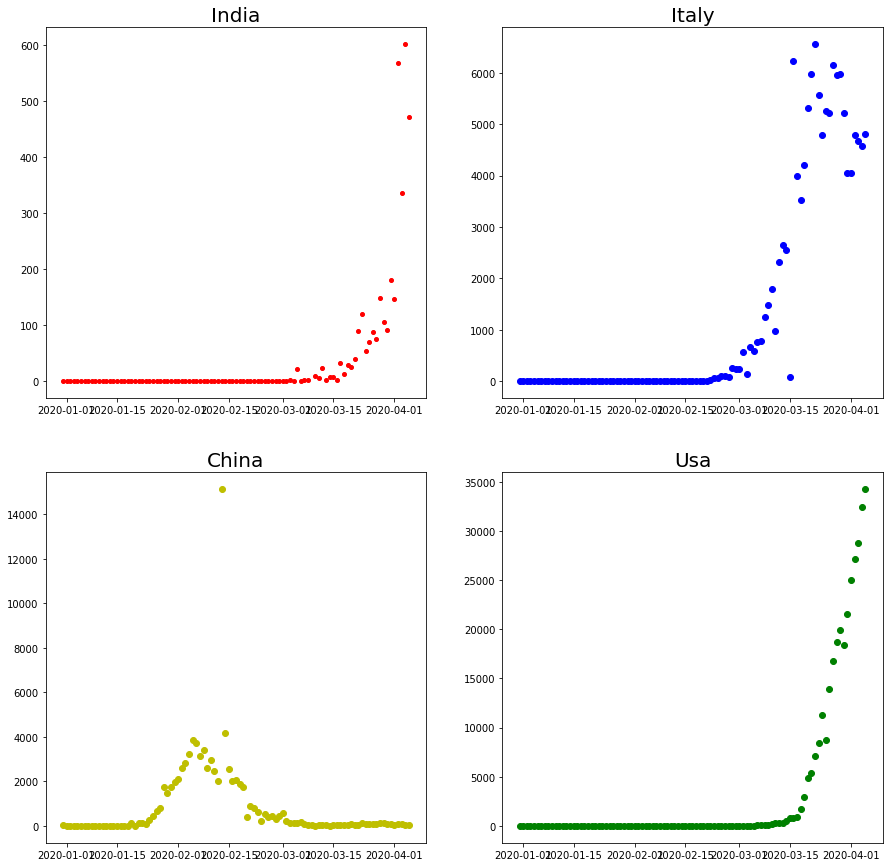

In [238]:
figure,axes=plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axes[0,0].plot(india_dates, india_cases, 'ro', markersize = 4)
#figure.autofmt_xdate()
axes[0,0].set_title('India',fontsize=20)
axes[0,1].plot(italy_data['dateRep'],italy_data['cases'], 'bo')
#figure.autofmt_xdate() 
axes[0,1].set_title('Italy',fontsize=20)
axes[1,0].plot(china_data['dateRep'],china_data['cases'], 'yo')
#figure.autofmt_xdate() 
axes[1,0].set_title('China',fontsize=20)
axes[1,1].plot(usa_data['dateRep'],usa_data['cases'], 'go')
#figure.autofmt_xdate() 
axes[1,1].set_title('Usa',fontsize=20)
plt.show()